# Merge sort algorithm

## Introduction

The merge sort algorithm uses the idea of divide and conquer, which reduces the big things to small ones and solves the small thing recursively, then gather the solutions together! The idea of divide and conquer includes the divide, resolve, and merge processes.

1. Divide: divide the sequence to be sorted into two subsequences (usually from the middle).
2. Resolve: call the resolve function recursively on subsequences until the subsequence can be sorted directly.
3. Merge: merge the sorted subsequences to get the sorting solution of the parent sequence.

## How to run?

All the animations in this notebook are rendered by the [algviz](https://algviz.com/) algorithm animation engine in real time. You can follow this [guidance](https://algviz.com/en/installation.html) to set up your local environment or run this repo on Gitpod directly.

*If you meet any problem, please report an 👉[issue](https://github.com/zjl9959/algviz/issues)👈 here.*

## References

+ https://algviz.com/en/MergeSort/
+ https://algviz.com/en/RecursiveTree/

In [1]:
import algviz

class MergeSort():
    def __init__(self, nums_):
        self.viz = algviz.Visualizer(2.0)
        self.nums = self.viz.createVector(nums_, name='Numbers', cell_size=(40, 200), histogram=True)
        self.merge_list = self.viz.createVector(name='Merge list', show_index=False)
        self.tree = algviz.RecursiveTree(self.viz)
        self.solve(0, len(nums_))
    
    def solve(self, l, r):
        if l < r - 1:
            self.tree.forward('{}:{}'.format(l, r))
            m = (l + r)//2
            self.solve(l, m)
            self.solve(m, r)
            self.nums.mark(algviz.color_gray, 0, l, hold=True)
            if r < len(self.nums):
                self.nums.mark(algviz.color_gray, r, len(self.nums), hold=True)
            self.merge(l, m, r)
            self.tree.backward()
            self.nums.removeMark(algviz.color_gray)
    
    def merge(self, l, m, r):
        # Take out the smaller elements in the subsequence in turn and place them in the merge_list.
        ll = l; mm = m
        self.viz.display()
        while ll < m and mm < r:
            if self.nums[ll] > self.nums[mm]:
                self.merge_list.append(self.nums[mm])
                self.nums.mark(algviz.color_gold, mm); self.nums.mark(algviz.color_dark_green, ll)
                self.merge_list.mark(algviz.color_gold, len(self.merge_list)-1); self.viz.display()
                mm += 1; self.viz.display(1)
            else:
                self.merge_list.append(self.nums[ll])
                self.nums.mark(algviz.color_gold, ll); self.nums.mark(algviz.color_dark_green, mm)
                self.merge_list.mark(algviz.color_gold, len(self.merge_list)-1); self.viz.display()
                ll += 1; self.viz.display(1)
        while ll < m:
            self.merge_list.append(self.nums[ll])
            self.nums.mark(algviz.color_gold, ll)
            self.merge_list.mark(algviz.color_gold, len(self.merge_list)-1); self.viz.display()
            ll += 1; self.viz.display(1)
        while mm < r:
            self.merge_list.append(self.nums[mm])
            self.nums.mark(algviz.color_gold, mm)
            self.merge_list.mark(algviz.color_gold, len(self.merge_list)-1); self.viz.display()
            mm += 1; self.viz.display(1)
        # Copies the merge_list into the origin subsequence to be resolved.
        self.viz.display()
        for i in range(l, r):
            self.merge_list.mark(algviz.color_spring_green, 0)
            self.nums[i] = self.merge_list.pop(0)
            self.nums.mark(algviz.color_spring_green, i)
            self.viz.display()

Numbers:

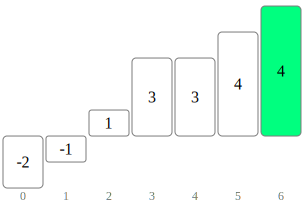

Merge list:

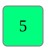

Recursive tree:

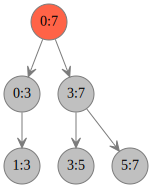

In [2]:
input_nums = [5, 3, -2, 3, -1, 1, 4]
solver = MergeSort(input_nums)